In [2]:
import numpy as np
import os
import os.path as osp
import pandas as pd
import glob
import json
import pickle

In [2]:
results = {}

POSEC3D_RES = sorted(glob.glob('./results/posec3d*'))
for dir_ in POSEC3D_RES:
    name = osp.basename(dir_)
    res_dir = sorted(glob.glob(osp.join(dir_, '*/')))[-1]
    res_file = glob.glob(osp.join(res_dir, '*.json'))[-1]
    with open(res_file) as f:
        res = json.load(f)
    results[name] = res['acc/top1']

STGCN_RES = sorted(glob.glob('./results/stgcn*'))
for dir_ in STGCN_RES:
    name = osp.basename(dir_)
    res_dir = sorted(glob.glob(osp.join(dir_, '*/')))[-1]
    res_file = glob.glob(osp.join(res_dir, '*.json'))[-1]
    with open(res_file) as f:
        res = json.load(f)
    results[name] = res['acc/top1']

STGCN_RES = sorted(glob.glob('./results/infogcn*'))
for dir_ in STGCN_RES:
    name = osp.basename(dir_)
    res_file = glob.glob(osp.join(dir_, 'log.txt'))[-1]
    with open(res_file) as f:
        lines = f.readlines()
    acc_line = [l for l in lines if 'Best accuracy:' in l][0].strip()
    acc = float(acc_line.split(' ')[-1])
    results[name] = acc

In [3]:
results

{'posec3d_infact_plus_2d_primitive': 0.7105263157894737,
 'posec3d_infact_plus_2d_primitive_FT': 0.6973684210526315,
 'posec3d_infact_plus_2d_transitional': 0.5,
 'posec3d_infact_plus_2d_transitional_FT': 0.6875,
 'stgcn_infact_plus_2d_primitive': 0.5657894736842105,
 'stgcn_infact_plus_2d_primitive_FT': 0.618421052631579,
 'stgcn_infact_plus_2d_transitional': 0.375,
 'stgcn_infact_plus_2d_transitional_FT': 0.5625,
 'stgcn_infact_plus_3d_primitive': 0.6710526315789473,
 'stgcn_infact_plus_3d_primitive_FT': 0.6973684210526315,
 'stgcn_infact_plus_3d_transitional': 0.5625,
 'stgcn_infact_plus_3d_transitional_FT': 0.65625,
 'infogcn_Data_InfAct_plus_2d_primitive_InfAct_plus': 0.6973684210526315,
 'infogcn_Data_InfAct_plus_2d_primitive_InfAct_plus_FT': 0.6842105263157895,
 'infogcn_Data_InfAct_plus_2d_transitional_InfAct_plus': 0.46875,
 'infogcn_Data_InfAct_plus_2d_transitional_InfAct_plus_FT': 0.5,
 'infogcn_Data_InfAct_plus_3d_primitive_InfAct_plus': 0.6973684210526315,
 'infogcn_Data_I

In [3]:
def read_preds(pth):
    with open(pth, 'rb') as f:
        preds_file = pickle.load(f)

    gts = np.array([i['gt_labels']['item'].item() for i in preds_file])
    preds = np.array([i['pred_labels']['item'].item() for i in preds_file])

    return gts, preds

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
POSTURE_LABEL2IDS = {'Supine': 0, 'Prone': 1, 'Sitting': 2, 'Standing': 3, 'All-fours': 4}
POSTURE_IDS2LABEL = {v:k for k,v in POSTURE_LABEL2IDS.items()}

def plot_cm(gts, preds, ax=None):
    labels = list(POSTURE_IDS2LABEL.values())
    cm = ConfusionMatrixDisplay.from_predictions(y_true=gts, y_pred=preds, normalize='true', display_labels=labels, ax=ax)
    return cm

In [6]:
MODEL = 'posec3d'
DIM = '2d'
FOLD = 'primitive'
gts, preds = read_preds(f'./results_test/{MODEL}_infact_plus_{DIM}_{FOLD}/preds.pkl')

with open(f'./results_test/{MODEL}_infact_plus_{DIM}_{FOLD}/preds.pkl', 'rb') as f:
    a = pickle.load(f)

In [21]:
a[0]['pred_feats']['item'].detach().numpy()

(512,)

Text(0.5, 1.0, 'model: stgcn, dim: 3d, actions: primitive, accuracy: 45.39%')

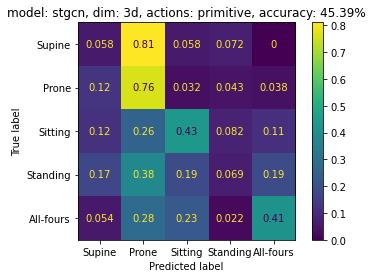

In [71]:
MODEL = 'stgcn'
DIM = '3d'
FOLD = 'primitive'
gts, preds = read_preds(f'./results_test/{MODEL}_infact_plus_{DIM}_{FOLD}/preds.pkl')
acc = sum(gts==preds)/len(preds)
fig, ax = plt.subplots()
plot_cm(gts, preds, ax)
ax.set_title(f'model: {MODEL}, dim: {DIM}, actions: {FOLD}, accuracy: {acc*100:.2f}%')